This notebook is used to visualize the results and generate plots. 
Sirisha Rambhatla, June 2021

In [208]:
import gc

import pandas as pd
import pickle

import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from geopy.distance import great_circle, distance
from sklearn.cluster import KMeans
from scipy import stats
import random
from argparse import ArgumentParser
from shapely.geometry import Polygon as shapPoly
from shapely.geometry import MultiPolygon
import shapely
import contextily as ctx

import geopandas as gpd
from shapely.ops import cascaded_union
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords, coords_to_points
from shapely.geometry import Point
from shapely.geometry import Polygon as shapPoly

from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import matplotlib as mpl
import matplotlib.cm as cm
import subprocess

import glob
import os

def generate_video(folder, video_name):
    os.chdir(folder)
    subprocess.call([
        'ffmpeg', '-framerate', '8', '-i', 'file%02d.png', '-r', '30', '-pix_fmt', 'yuv420p', 'shell=True', video_name])
    for file_name in glob.glob("*.png"):
        os.remove(file_name)

NUM_COLORS = 5
data_folder = '<path to gowalla>'


In [241]:
#data_folder = "/home/users/sirishar/analyze/data/"
K0 = np.genfromtxt(data_folder + 'risk' + '.csv', delimiter=',' )
clus_locs = np.load(data_folder + 'cluster_centers__' + str(NUM_COLORS) + '.npy')


In [245]:
sf = gpd.read_file("/tank/users/sirishar/analyze/maps/SF_shapefile/bayarea_general.shp")
sf = sf.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})
boundary_shape = sf[sf['AREA_NAME']=='Other']['geometry'].values[0]
boundary_shape = boundary_shape[0]

ind = set(np.arange(0,NUM_COLORS))
ind.discard(1)

ind = np.array(list(ind))
clus_locs[2] = clus_locs[2] + 0.0005

(37.5, 38.0)

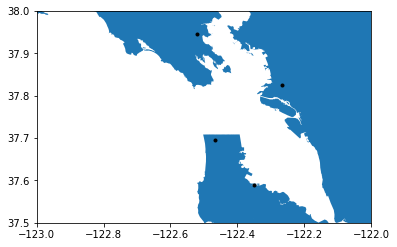

In [248]:
sf[sf['AREA_NAME']=='Other'].plot()
for i in ind:
    plt.scatter(clus_locs[i,1],clus_locs[i,0], color='black', marker='.')
    
plt.xlim([-123, -122])
plt.ylim([37.5, 38])

In [250]:
# Temporary Folder location (we store images here to create gifs)
folder = data_folder + 'risk_gif_' + str(NUM_COLORS) + '/'
if not folder:
    os.mkdir(folder)
# Scale Risk to be between 0 and 1
K0_scaled = (K0 - np.ravel(K0).min())/(np.ravel(K0).max() - np.ravel(K0).min())
#points = gpd.GeoSeries(list(zip(clus_locs[ind,1], clus_locs[ind,0]))).map(Point)
points = [shapely.geometry.Point(clus_locs[i,1], clus_locs[i,0]) for i in ind]

# normalize chosen colormap
norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=True)
#mapper = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

coords = points_to_coords(points)
#coords = clus_locs
# Calculate Voronoi Regions
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coords, boundary_shape, farpoints_max_extend_factor=10000000)
#norm = mpl.colors.Normalize(vmin=0, vmax=1, clip=True)
colors = cm.ScalarMappable(norm=norm, cmap=cm.Blues_r)

cmap = plt.get_cmap('Reds')

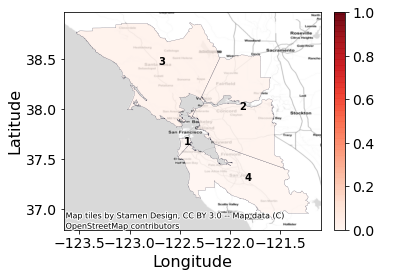

<Figure size 432x288 with 0 Axes>

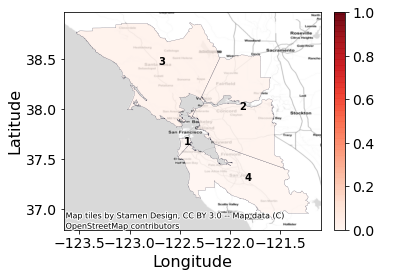

<Figure size 432x288 with 0 Axes>

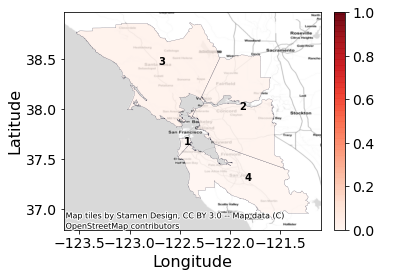

<Figure size 432x288 with 0 Axes>

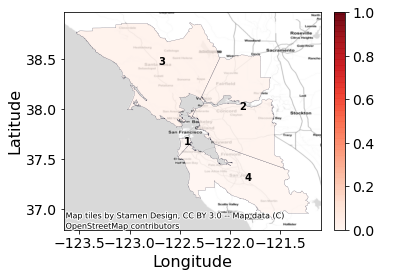

<Figure size 432x288 with 0 Axes>

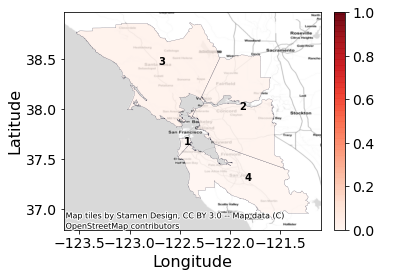

<Figure size 432x288 with 0 Axes>

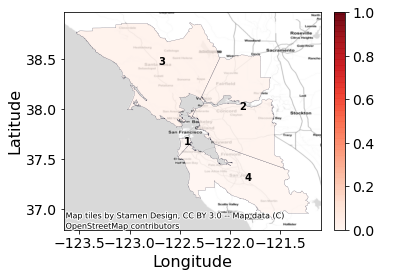

<Figure size 432x288 with 0 Axes>

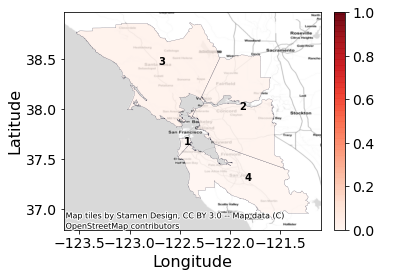

<Figure size 432x288 with 0 Axes>

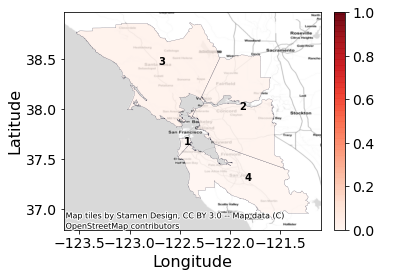

<Figure size 432x288 with 0 Axes>

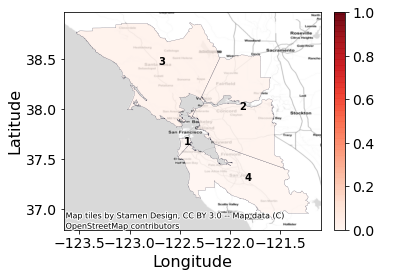

<Figure size 432x288 with 0 Axes>

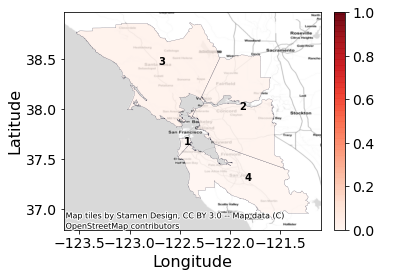

<Figure size 432x288 with 0 Axes>

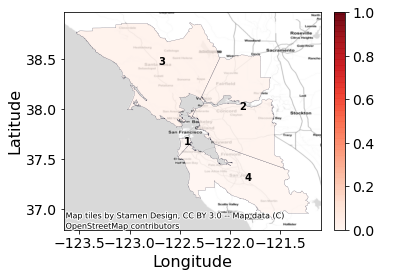

<Figure size 432x288 with 0 Axes>

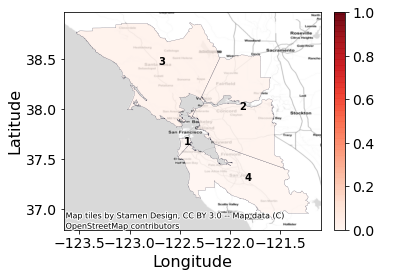

<Figure size 432x288 with 0 Axes>

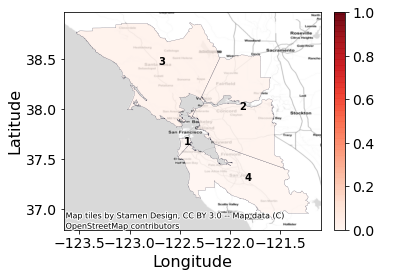

<Figure size 432x288 with 0 Axes>

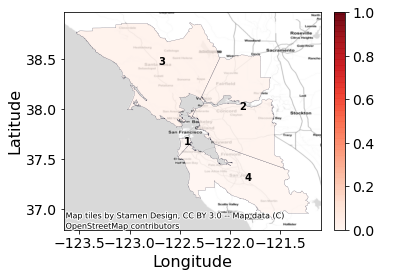

<Figure size 432x288 with 0 Axes>

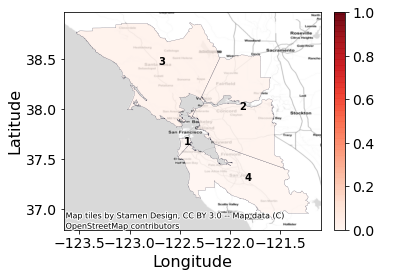

<Figure size 432x288 with 0 Axes>

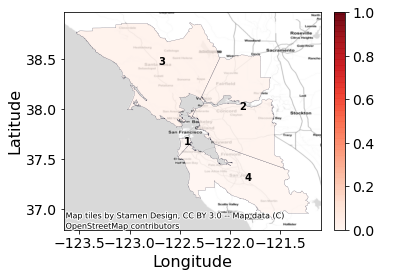

<Figure size 432x288 with 0 Axes>

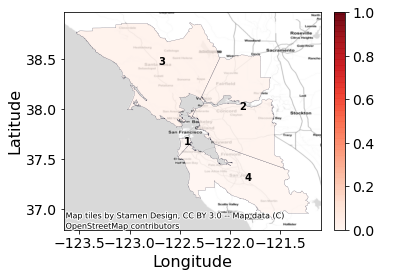

<Figure size 432x288 with 0 Axes>

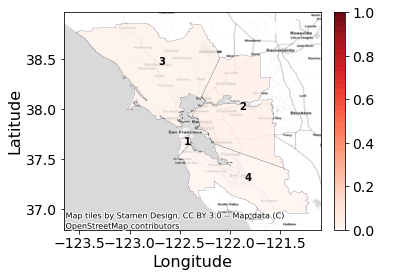

<Figure size 432x288 with 0 Axes>

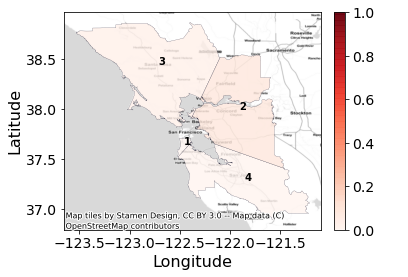

<Figure size 432x288 with 0 Axes>

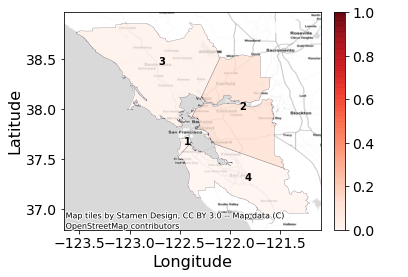

<Figure size 432x288 with 0 Axes>

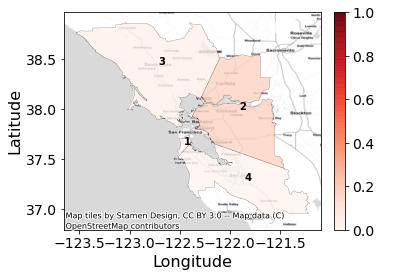

<Figure size 432x288 with 0 Axes>

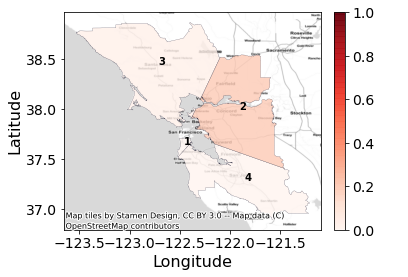

<Figure size 432x288 with 0 Axes>

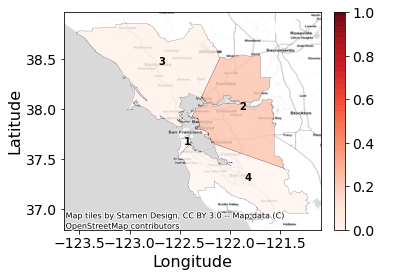

<Figure size 432x288 with 0 Axes>

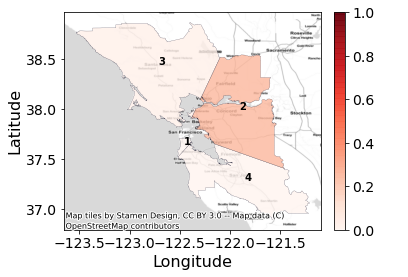

<Figure size 432x288 with 0 Axes>

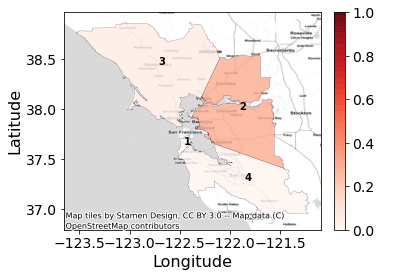

<Figure size 432x288 with 0 Axes>

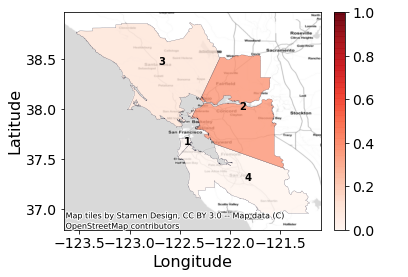

<Figure size 432x288 with 0 Axes>

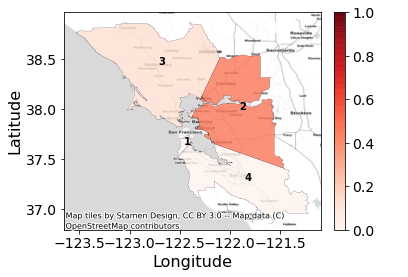

<Figure size 432x288 with 0 Axes>

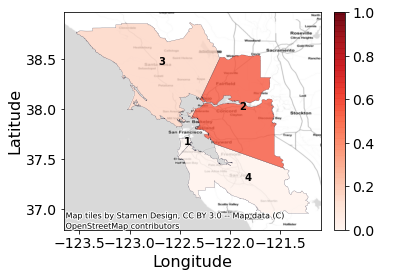

<Figure size 432x288 with 0 Axes>

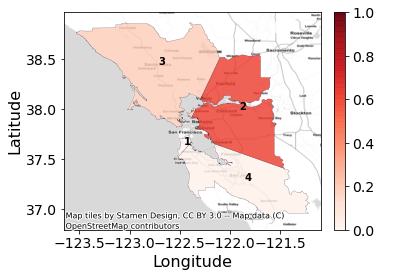

<Figure size 432x288 with 0 Axes>

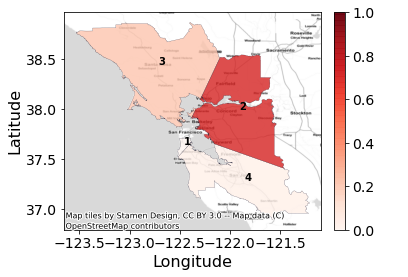

<Figure size 432x288 with 0 Axes>

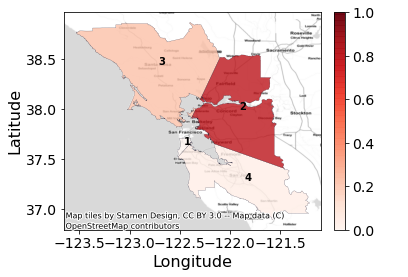

<Figure size 432x288 with 0 Axes>

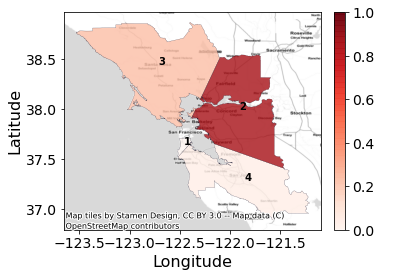

<Figure size 432x288 with 0 Axes>

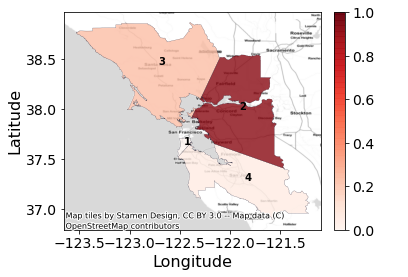

<Figure size 432x288 with 0 Axes>

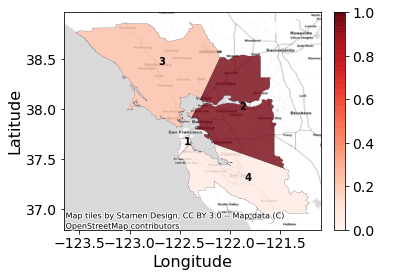

<Figure size 432x288 with 0 Axes>

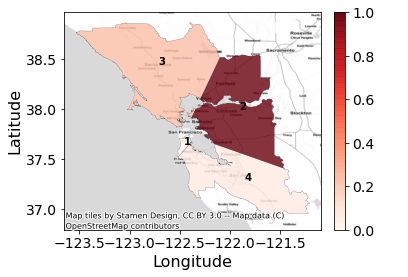

<Figure size 432x288 with 0 Axes>

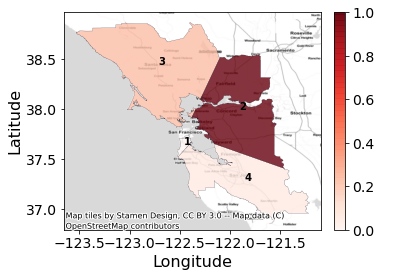

<Figure size 432x288 with 0 Axes>

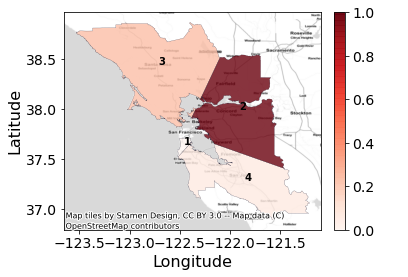

<Figure size 432x288 with 0 Axes>

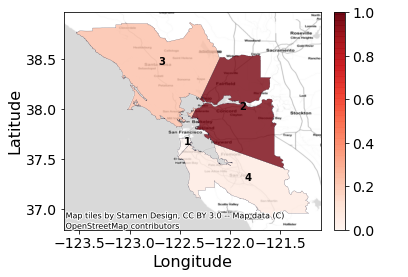

<Figure size 432x288 with 0 Axes>

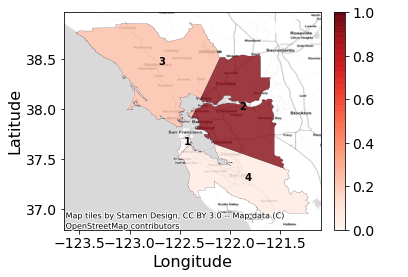

<Figure size 432x288 with 0 Axes>

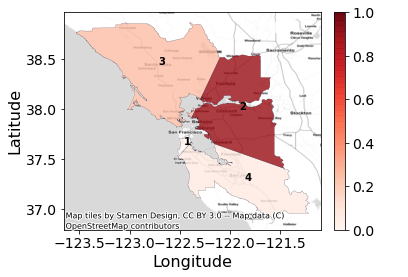

<Figure size 432x288 with 0 Axes>

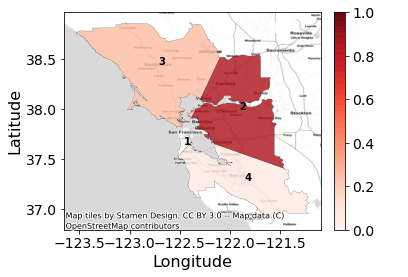

<Figure size 432x288 with 0 Axes>

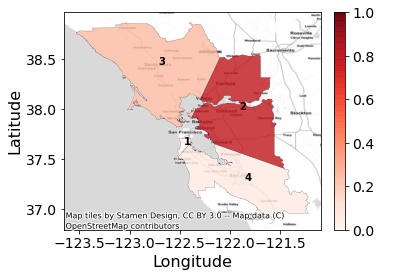

<Figure size 432x288 with 0 Axes>

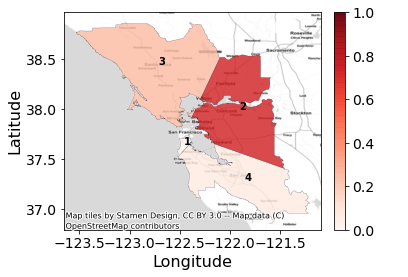

<Figure size 432x288 with 0 Axes>

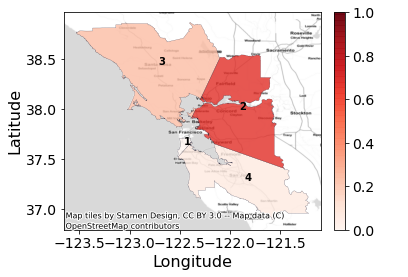

<Figure size 432x288 with 0 Axes>

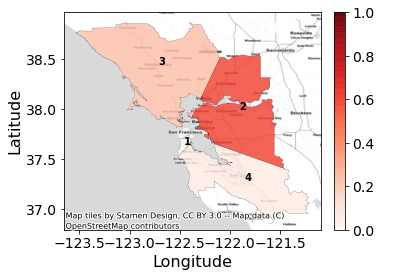

<Figure size 432x288 with 0 Axes>

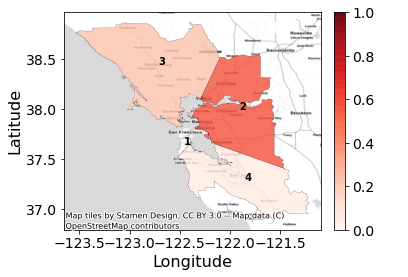

<Figure size 432x288 with 0 Axes>

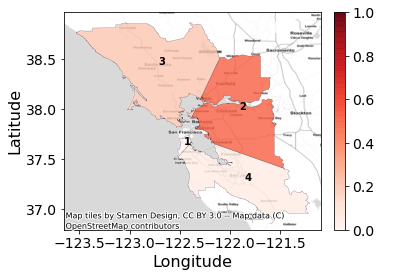

<Figure size 432x288 with 0 Axes>

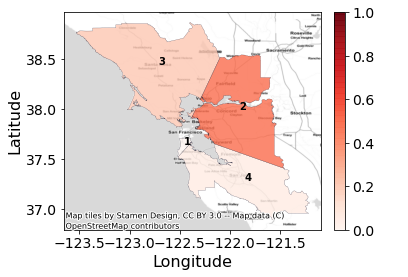

<Figure size 432x288 with 0 Axes>

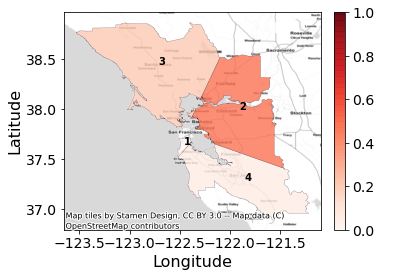

<Figure size 432x288 with 0 Axes>

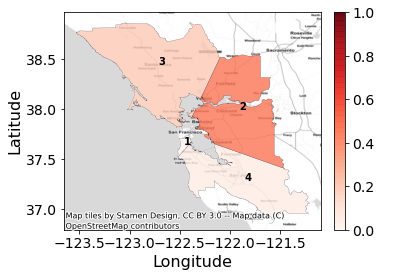

<Figure size 432x288 with 0 Axes>

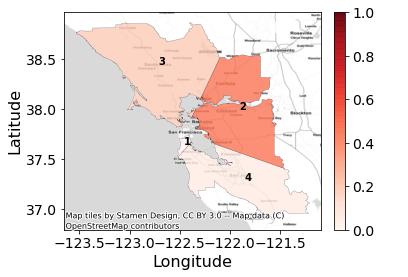

<Figure size 432x288 with 0 Axes>

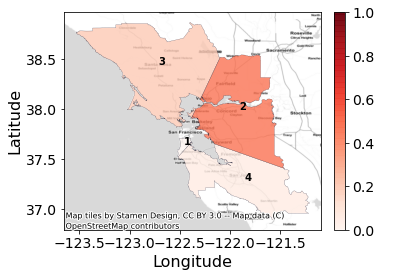

<Figure size 432x288 with 0 Axes>

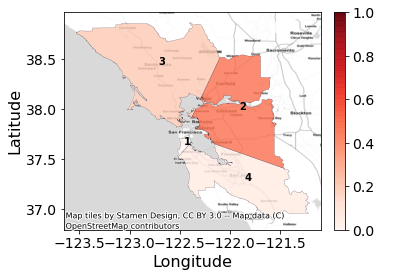

<Figure size 432x288 with 0 Axes>

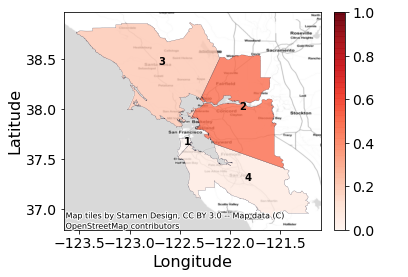

<Figure size 432x288 with 0 Axes>

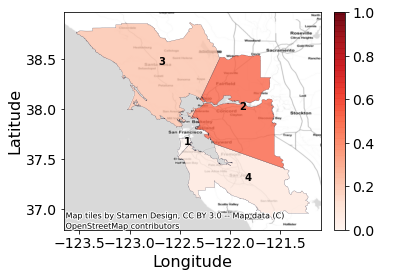

<Figure size 432x288 with 0 Axes>

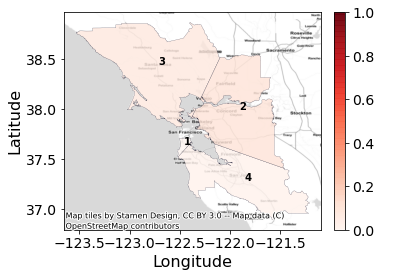

<Figure size 432x288 with 0 Axes>

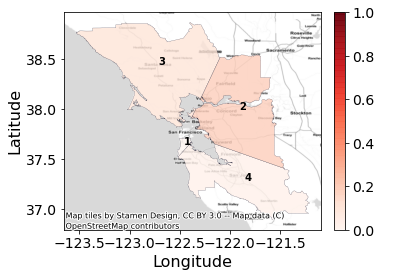

<Figure size 432x288 with 0 Axes>

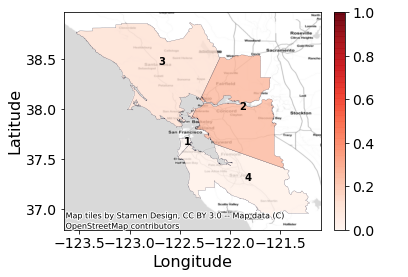

<Figure size 432x288 with 0 Axes>

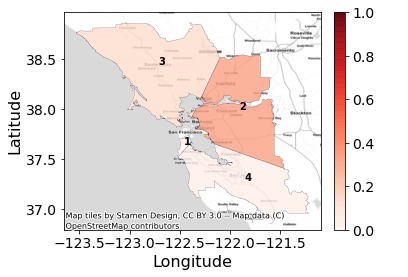

<Figure size 432x288 with 0 Axes>

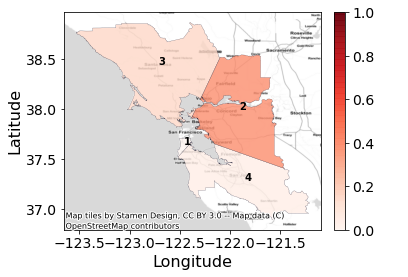

<Figure size 432x288 with 0 Axes>

In [251]:
for i in range(K0.shape[1]):
    patches = []
    fig,ax = plt.subplots(1)
    
    poly_to_pt = np.squeeze(poly_to_pt_assignments)
    cols = cmap(K0_scaled[0:NUM_COLORS,i])
    colors = []
    #colors = cmap(K0_scaled[0:NUM_COLORS,i]) # convert nfloors to colors that we can use later

# r = 0
    #for r in range(len(ind)):
    for r in poly_to_pt:
        #if (r != 11) & (r != 12) & (r != 13):
        if poly_shapes[r].type == 'Polygon':
        
            try:
                x, y = poly_shapes[r].exterior.coords.xy
                verts = list(zip(x, y))
                s_poly = shapPoly(verts)

                polygon = Polygon(verts)
                patches.append(polygon)
                #plt.annotate(str(ind[r]+1), s_poly.centroid.coords[0],weight='bold', size=10)
                plt.annotate(str(r+1), s_poly.centroid.coords[0],weight='bold', size=10)

                colors.append(cols[r])
            except:
                continue
        elif poly_shapes[r].type == 'MultiPolygon':
            try:
                temp = poly_shapes[r]
                area_poly = [ ap.area for ap in poly_shapes[r]]
                max_id = area_poly.index(max(area_poly))
                for ii in range(0, len(poly_shapes[r])):
                    x, y = temp[ii].exterior.coords.xy
                    verts = list(zip(x, y))
                    s_poly = shapPoly(verts)
                    
                    polygon = Polygon(verts)
                    patches.append(polygon)
                    colors.append(cols[r])
                    #print(r)
                    if ii == max_id:
                        #plt.annotate(str(ind[r]+1), s_poly.centroid.coords[0],weight='bold', size=10)
                        plt.annotate(str(r+1), s_poly.centroid.coords[0],weight='bold', size=10)
            except:
                continue

        
    collection = PatchCollection(patches, cmap=cmap,linewidths=0.2, alpha=0.8)
    collection.set_color(colors)
    collection.set_edgecolors([[0, 0, 0.1, 1.0], [0, 0, 0.1, 0.5]])
    
    #ax.colorbar(collection)
    ax.add_collection(collection)
    cb = plt.colorbar(collection, alpha=0.8, fraction=0.05, pad=0.04)
    cb.ax.tick_params(labelsize=14)
    
    plt.xlabel('Longitude', size = 16)
    plt.ylabel('Latitude', size=16)
   
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    


    plt.locator_params(axis="x", nbins=7)
    plt.locator_params(axis="y", nbins=8)

    ax.autoscale_view()
    ctx.add_basemap(ax,crs='epsg:4326', source=ctx.providers.Stamen.TonerLite)

    plt.show()
    plt.savefig(folder + "frame%02d.png" % i, bbox_inches='tight')

In [264]:
from glob import glob
#create plots
CLUSTER_NUM = 2
CLUSTER_NUM = CLUSTER_NUM - 1

input_mobility = glob(data_folder + 'cluster_checkin_events_5_*.csv')[0]
input_infections = glob(data_folder + 'cluster_inf_events_5*.csv')[0]
input_risk = glob(data_folder + 'risk.csv')[0]



In [265]:
infections = pd.read_csv(input_infections)
mobility = pd.read_csv(input_mobility)
risk = pd.read_csv(input_risk, header=None)

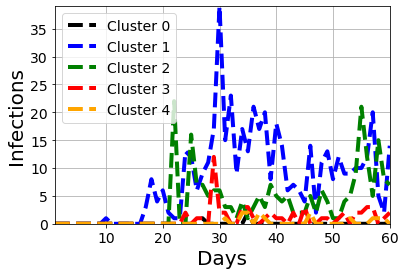

In [305]:
fig,ax = plt.subplots(1)

days = np.arange(1,61)

# Average
#plt.plot(days, infections.values[0:60,1:].mean(axis=1), linestyle='-', lw=4, color='red')
colors = ['black', 'blue', 'green','red', 'orange' ]
# Specific
for i in range(0, NUM_COLORS):
    plt.plot(days, infections[str(i)][0:60], linestyle='--', lw=4, color=colors[i])


plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], fontsize=14)

plt.xlabel('Days', size = 20)
plt.ylabel('Infections', size=20)
plt.xticks(size = 14)
plt.yticks(size = 14)



plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=9)
plt.grid()

ax.autoscale(enable=True, axis='both', tight=True)
#plt.savefig(data_folder + "specific_inf.png", bbox_inches='tight')

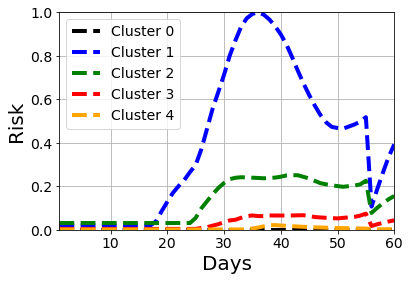

In [306]:
fig,ax = plt.subplots(1)

colors = ['black', 'blue', 'green','red', 'orange' ]

# Specific
for i in range(0, NUM_COLORS):
    plt.plot(days, risk.loc[i], linestyle='--', lw=4, color=colors[i])


plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], fontsize=14)

plt.xlabel('Days', size = 20)
plt.ylabel('Risk', size=20)
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=9)
plt.grid()

ax.autoscale(enable=True, axis='both', tight=True)
plt.savefig(data_folder + "specific_risk.png", bbox_inches='tight')

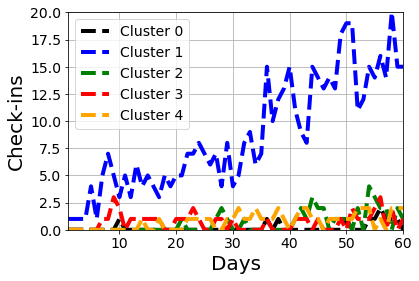

In [307]:
fig,ax = plt.subplots(1)

colors = ['black', 'blue', 'green','red', 'orange' ]
# Specific
for i in range(0, NUM_COLORS):
    total_mobility = mobility[mobility['Unnamed: 0']==i].iloc[0].values[2:62]
    plt.plot(days, total_mobility, linestyle='--', lw=4, color=colors[i])


plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], fontsize=14)


plt.xlabel('Days', size = 20)
plt.ylabel('Check-ins', size=20)
plt.xticks(size = 14)
plt.yticks(size = 14)



plt.locator_params(axis="x", nbins=10)
plt.locator_params(axis="y", nbins=9)
plt.grid()

ax.autoscale(enable=True, axis='both', tight=True)
#plt.savefig(folder + "specific_checkins.png", bbox_inches='tight')


In [299]:
mobility

Unnamed: 0       Mobility type  1253923200  1254009600  1254096000  \
0            0        self_traffic         0.0         0.0         0.0   
1            0          to_traffic         0.0         0.0         0.0   
2            0        from_traffic         0.0         0.0         0.0   
3            0  inf_mob_from_other         0.0         0.0         0.0   
4            0        inf_mob_self         0.0         0.0         0.0   
5            1        self_traffic         1.0         1.0         1.0   
6            1          to_traffic         0.0         1.0         0.0   
7            1        from_traffic         1.0         0.0         0.0   
8            1  inf_mob_from_other         0.0         0.0         0.0   
9            1        inf_mob_self         0.0         0.0         0.0   
10           2        self_traffic         0.0         0.0         0.0   
11           2          to_traffic         0.0         0.0         0.0   
12           2        from_traffic         0.0         0.0         1.0   
13           2  inf_mob_from_other         0.0         0.0         0.0   
14           2        inf_mob_self         0.0         0.0         0.0   
15           3        self_traffic         0.0         0.0         0.0   
16           3          to_traffic         0.0         0.0         0.0   
17           3        from_traffic         0.0         0.0         0.0   
18           3  inf_mob_from_other         0.0         0.0         0.0   
19           3        inf_mob_self         0.0         0.0         0.0   
20           4        self_traffic         0.0         0.0         0.0   
21           4          to_traffic         1.0         0.0         1.0   
22           4        from_traffic         0.0         1.0         0.0   
23           4  inf_mob_from_other         0.0         0.0         0.0   
24           4        inf_mob_self         0.0         0.0         0.0   

    1254182400  1254268800  1254355200  1254441600  1254528000  ...  \
0          0.0         0.0         0.0         0.0         0.0  ...   
1          0.0         0.0         0.0         0.0         0.0  ...   
2          0.0         0.0         0.0         0.0         0.0  ...   
3          0.0         0.0         0.0         0.0         0.0  ...   
4          0.0         0.0         0.0         0.0         0.0  ...   
5          1.0         4.0         1.0         5.0         7.0  ...   
6          0.0         0.0         0.0         0.0         1.0  ...   
7          0.0         0.0         0.0         0.0         1.0  ...   
8          0.0         0.0         0.0         0.0         0.0  ...   
9          0.0         0.0         0.0         0.0         0.0  ...   
10         0.0         0.0         0.0         0.0         0.0  ...   
11         0.0         0.0         0.0         0.0         0.0  ...   
12         0.0         0.0         0.0         0.0         0.0  ...   
13         0.0         0.0         0.0         0.0         0.0  ...   
14         0.0         0.0         0.0         0.0         0.0  ...   
15         0.0         0.0         0.0         1.0         1.0  ...   
16         0.0         0.0         0.0         0.0         1.0  ...   
17         0.0         0.0         0.0         0.0         1.0  ...   
18         0.0         0.0         0.0         0.0         0.0  ...   
19         0.0         0.0         0.0         0.0         0.0  ...   
20         0.0         0.0         0.0         0.0         0.0  ...   
21         0.0         0.0         0.0         0.0         0.0  ...   
22         0.0         0.0         0.0         0.0         0.0  ...   
23         0.0         0.0         0.0         0.0         0.0  ...   
24         0.0         0.0         0.0         0.0         0.0  ...   

    1312416000  1312502400  1312588800  1312675200  1312761600  1312848000  \
0          0.0         0.0         0.0         0.0         0.0         0.0   
1          0.0         0.0         0.0         0.0         0.0         0.0  